<a href="https://colab.research.google.com/github/facial09/Kaggle-Practice/blob/main/E_commerce(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install category_encoders

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, Normalizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Check Data

### Columns describe

- ID: ID Number of Customers.

- Warehouse block:- The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

- Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.

- Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.

- Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

- Cost of the product-: Cost of the Product in US Dollars.

- Prior purchases:- The Number of Prior Purchase.

- Product importance:- The company has categorized the product in the various parameter such as low, medium, high.

- Gender:- Male and Female.

- Discount offered:- Discount offered on that specific product.

- Weight in gms:- It is the weight in grams.

- Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [31]:
df = pd.read_csv('Train.csv', index_col = 'ID')

In [50]:
print(f'\033[1m\033[95m  Data preview \nData  \n\033[96m{df.head()} \n  \033[95mshape  \n\033[96m{df.shape} \n \033[95mDescribe  \n\033[96m{df.describe()} \n  \033[95mNull check  \n\033[96m{df.isna().sum()}')

  Data preview 
Data  
   Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
ID                                                                          
1                D           Flight                    4                2   
2                F           Flight                    4                5   
3                A           Flight                    2                2   
4                B           Flight                    3                3   
5                C           Flight                    2                2   

    Cost_of_the_Product  Prior_purchases Product_importance Gender  \
ID                                                                   
1                   177                3                low      F   
2                   216                2                low      M   
3                   183                4                low      M   
4                   176                4             medium      M   
5                

# HeatMap : check correlation with each columns

## Numerical data

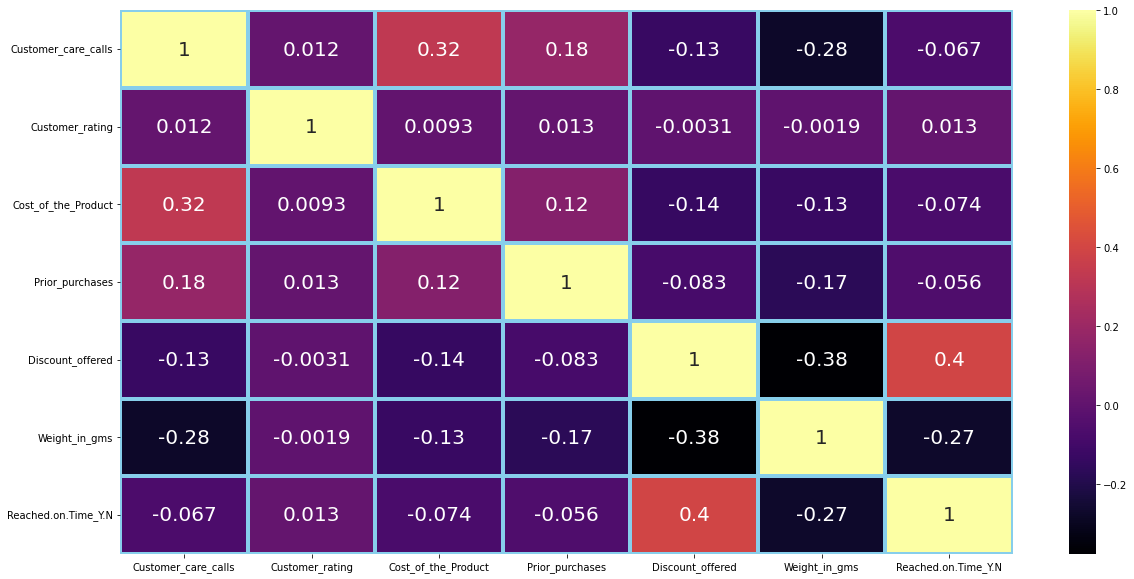

In [60]:
# make numerics list
numerics = ['int16','int32','int64']

# select by numerics list
df_num = df.select_dtypes(include = numerics)

# heatmap ( numerical columns )
plt.figure(figsize = (20, 10))
sns.heatmap(df_num.corr(), annot = True, linewidths = 3, cmap = 'inferno', linecolor = 'skyblue',annot_kws={"size": 20})
plt.show()

## OneHotEncoding

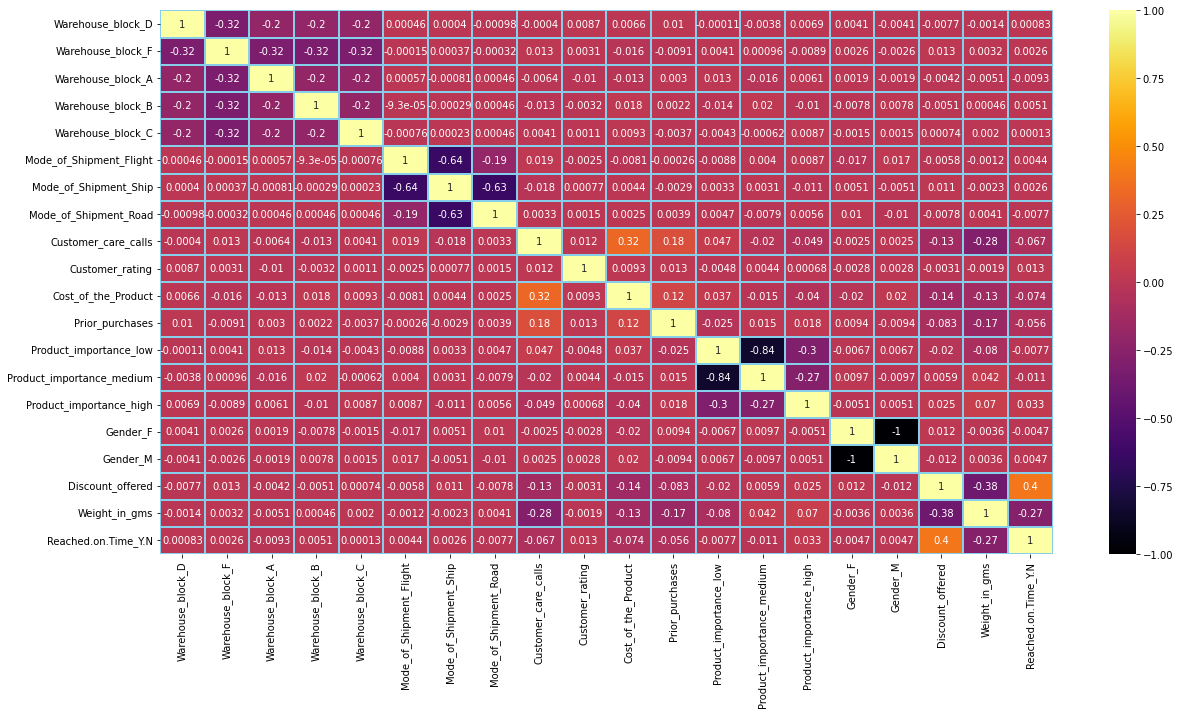

In [61]:
# For onehotencoding
encoder = OneHotEncoder(use_cat_names= True)
df_ecd = encoder.fit_transform(df)

# heatmap ( include categorical )
plt.figure(figsize = (20, 10))
sns.heatmap(df_ecd.corr(), annot = True, linewidths = 1, cmap = 'inferno', linecolor = 'skyblue')
plt.show()

## Category Data Ratio

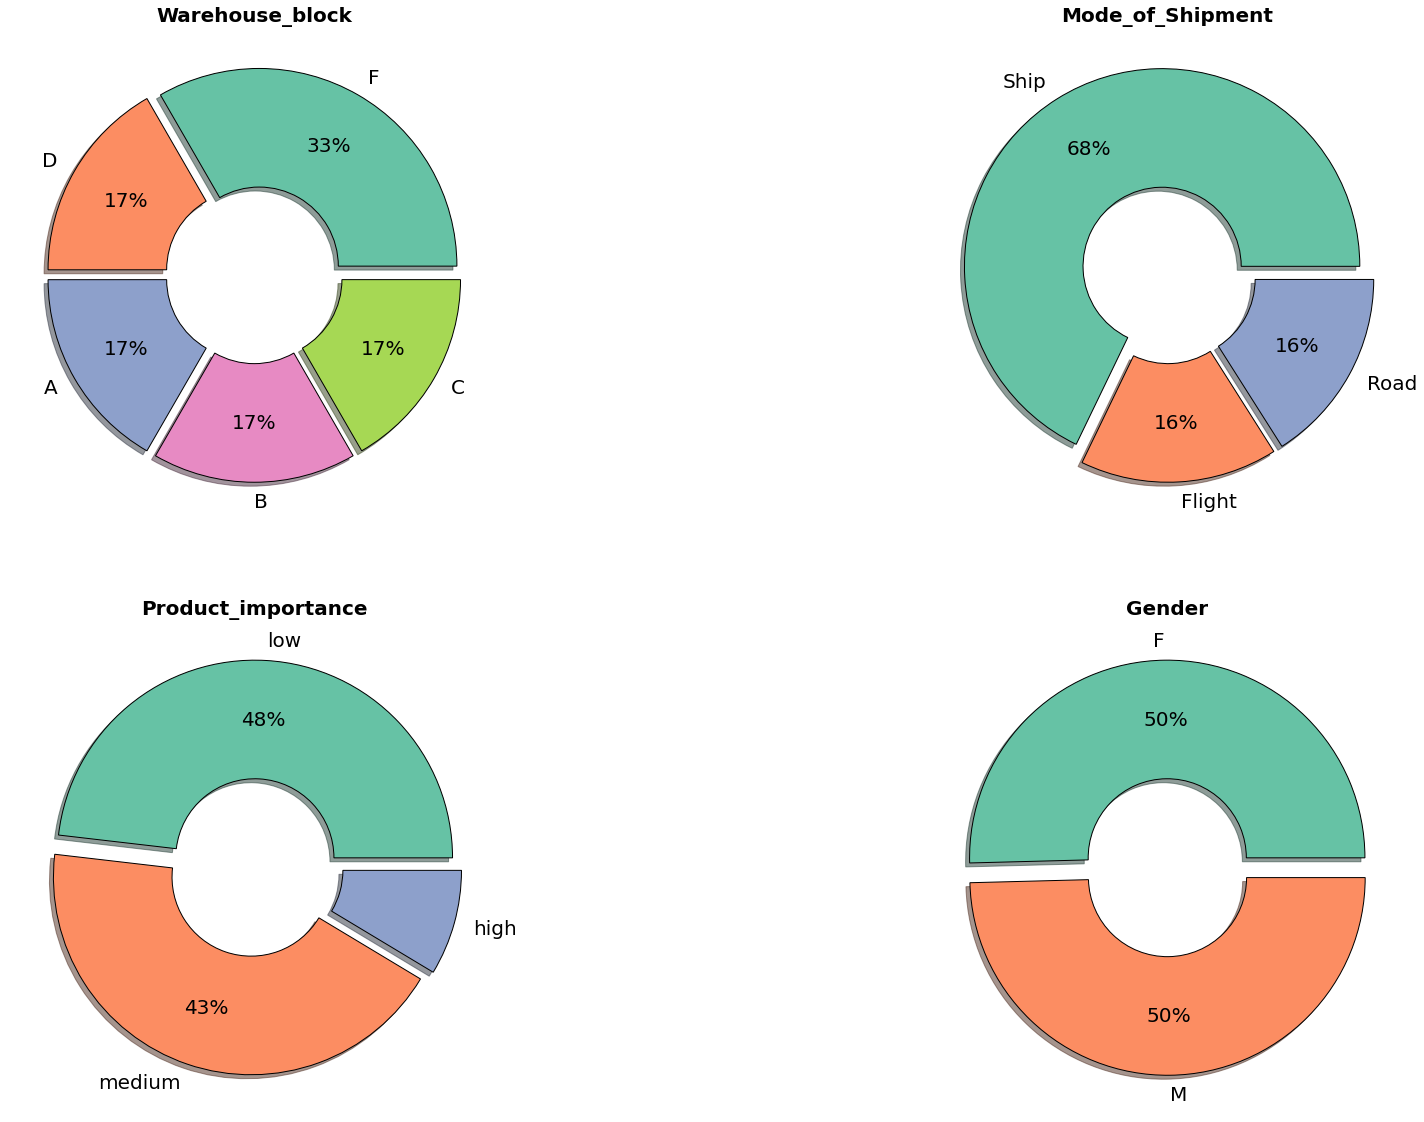

In [69]:
# plot size
fig, axes = plt.subplots(2,2, figsize = (30, 20))

# for pie plot property
textprops = dict(size=20, weight=10,color="black")
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
colors = sns.color_palette('Set2')[0:5]

# for pct
def custom_auto(pct):
  return('%.0f%%' % pct) if pct >=10 else ''

# categorical cols
features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# plt.pie
k=1
for i in range(len(features)):
  if k <= 4:
    ax = plt.subplot(2,2,k)
    plt.title(features[i], fontdict={'fontsize' : 20, 'fontweight' : 'bold'}, loc = 'center')
    df_i = df[features[i]].value_counts().reset_index()
    plt.pie(df_i[features[i]], labels = df_i['index'], autopct = custom_auto, 
            wedgeprops = wedgeprops, explode = [0.05] * len(df_i.index), colors = colors, pctdistance = 0.7,
            textprops = textprops, shadow = True)
    k += 1
    i += 1



# Feature Analysist

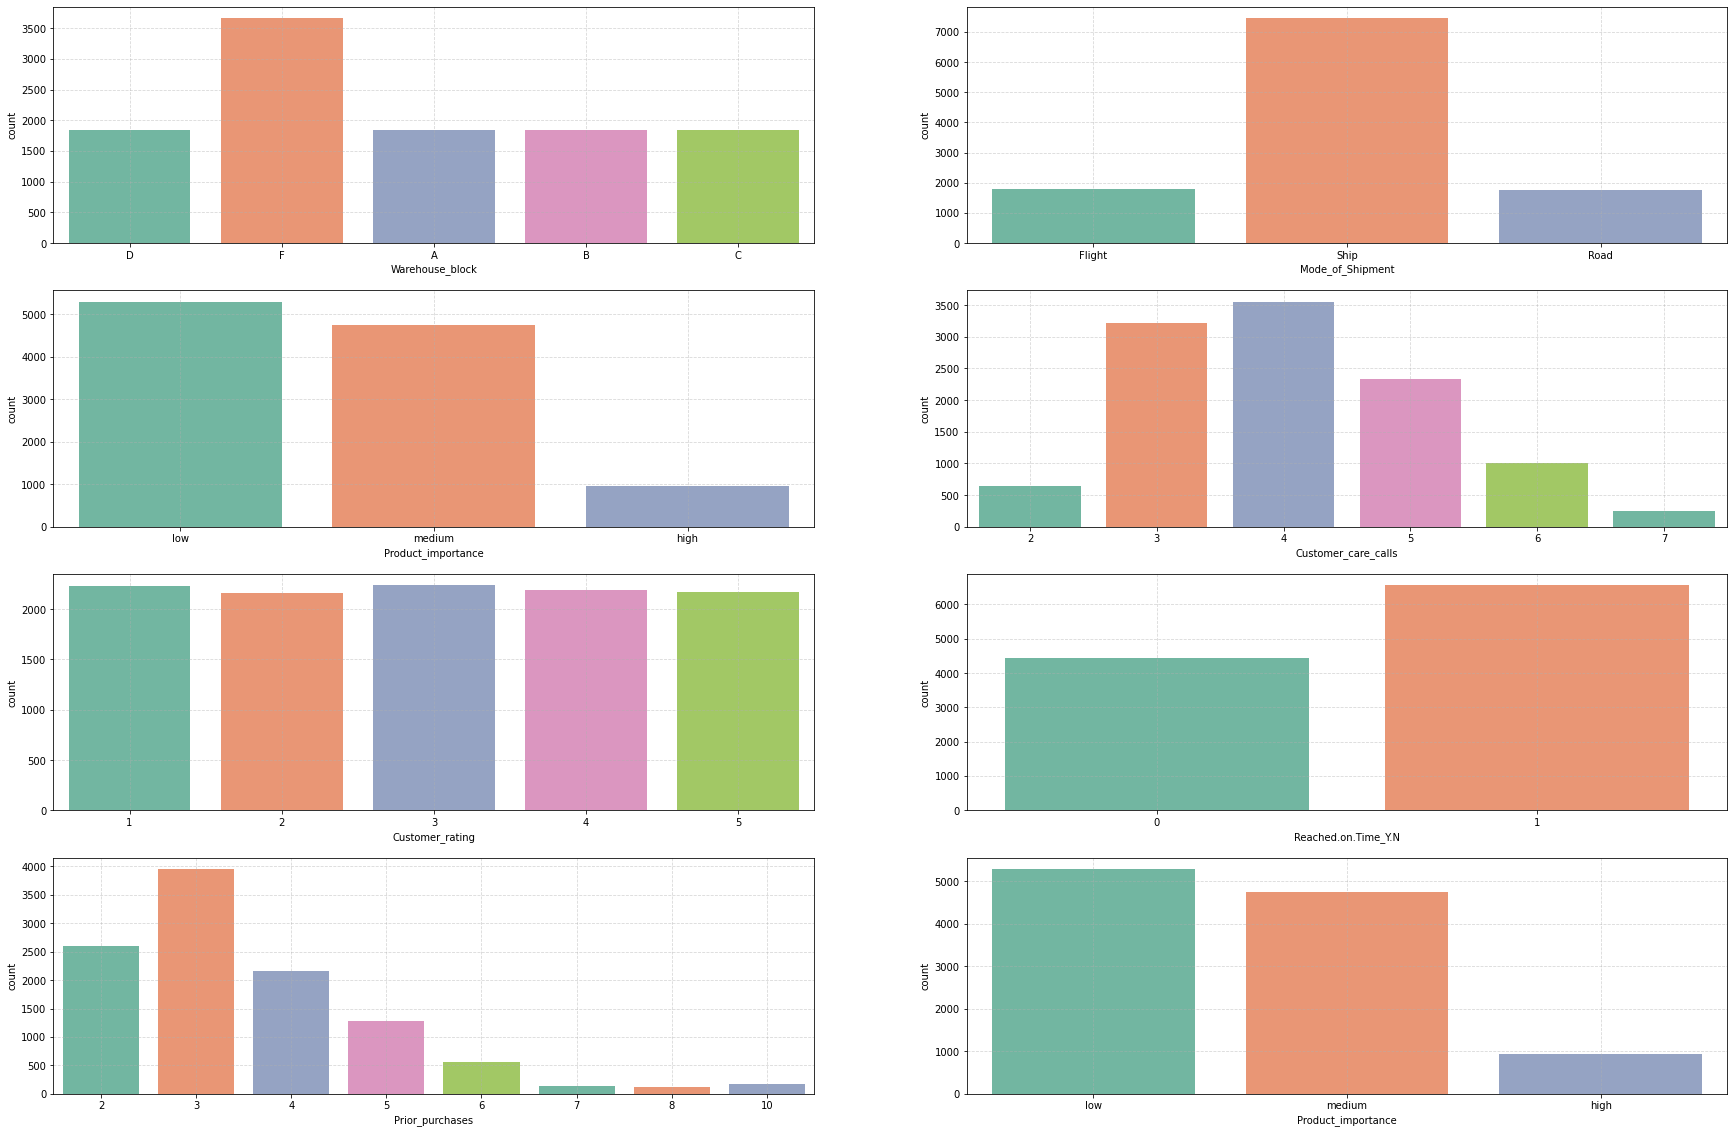

In [92]:
# plot size
fig, axes = plt.subplots(4,2, figsize = (30, 20))

# feature for compare
features_2 = ['Warehouse_block','Mode_of_Shipment','Product_importance','Customer_care_calls',
       'Customer_rating', 'Reached.on.Time_Y.N', 'Prior_purchases',
       'Product_importance']

# countplot
k=1
for i in range(len(features_2)):
  if k <= 8:
    plt.subplot(4,2,k)
    sns.countplot(df[features_2[i]],palette = colors)
    i += 1
    k += 1
    plt.grid(alpha = 0.5, linestyle = '--')
plt.show()

# Feature Analysist ( base on which Reach on Time or not)

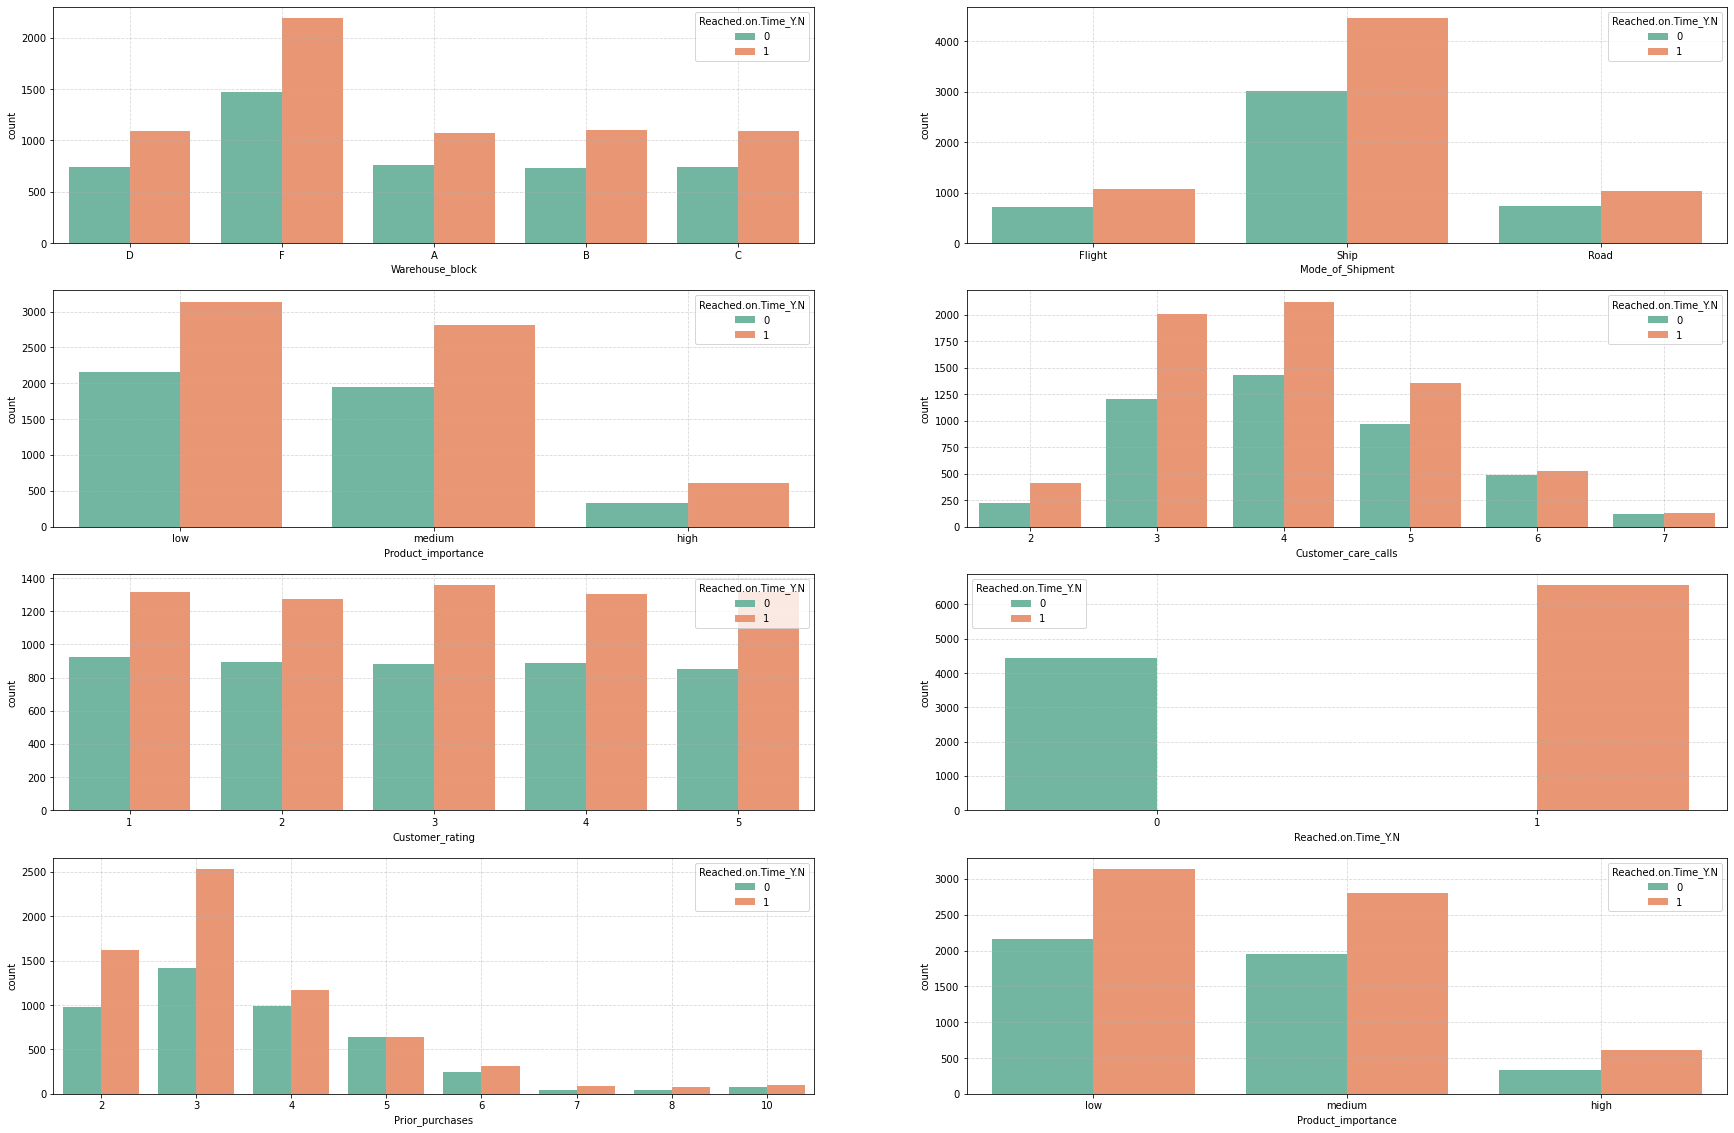

In [91]:
# plot size
fig, axes = plt.subplots(4,2, figsize = (30, 20))

# choose features
features_3 = ['Warehouse_block','Mode_of_Shipment','Product_importance','Customer_care_calls',
       'Customer_rating', 'Reached.on.Time_Y.N', 'Prior_purchases',
       'Product_importance']
       
# countplot
k=1
for i in range(len(features_2)):
  if k <= 8:
    plt.subplot(4,2,k)
    sns.countplot(features_2[i], hue = 'Reached.on.Time_Y.N' ,palette = colors, data = df)
    i += 1
    k += 1
    plt.grid(alpha = 0.5, linestyle = '--')

plt.show()

In [107]:
df_num.columns.tolist()

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

# Which columns is related with Reach on Time.Y.N ?

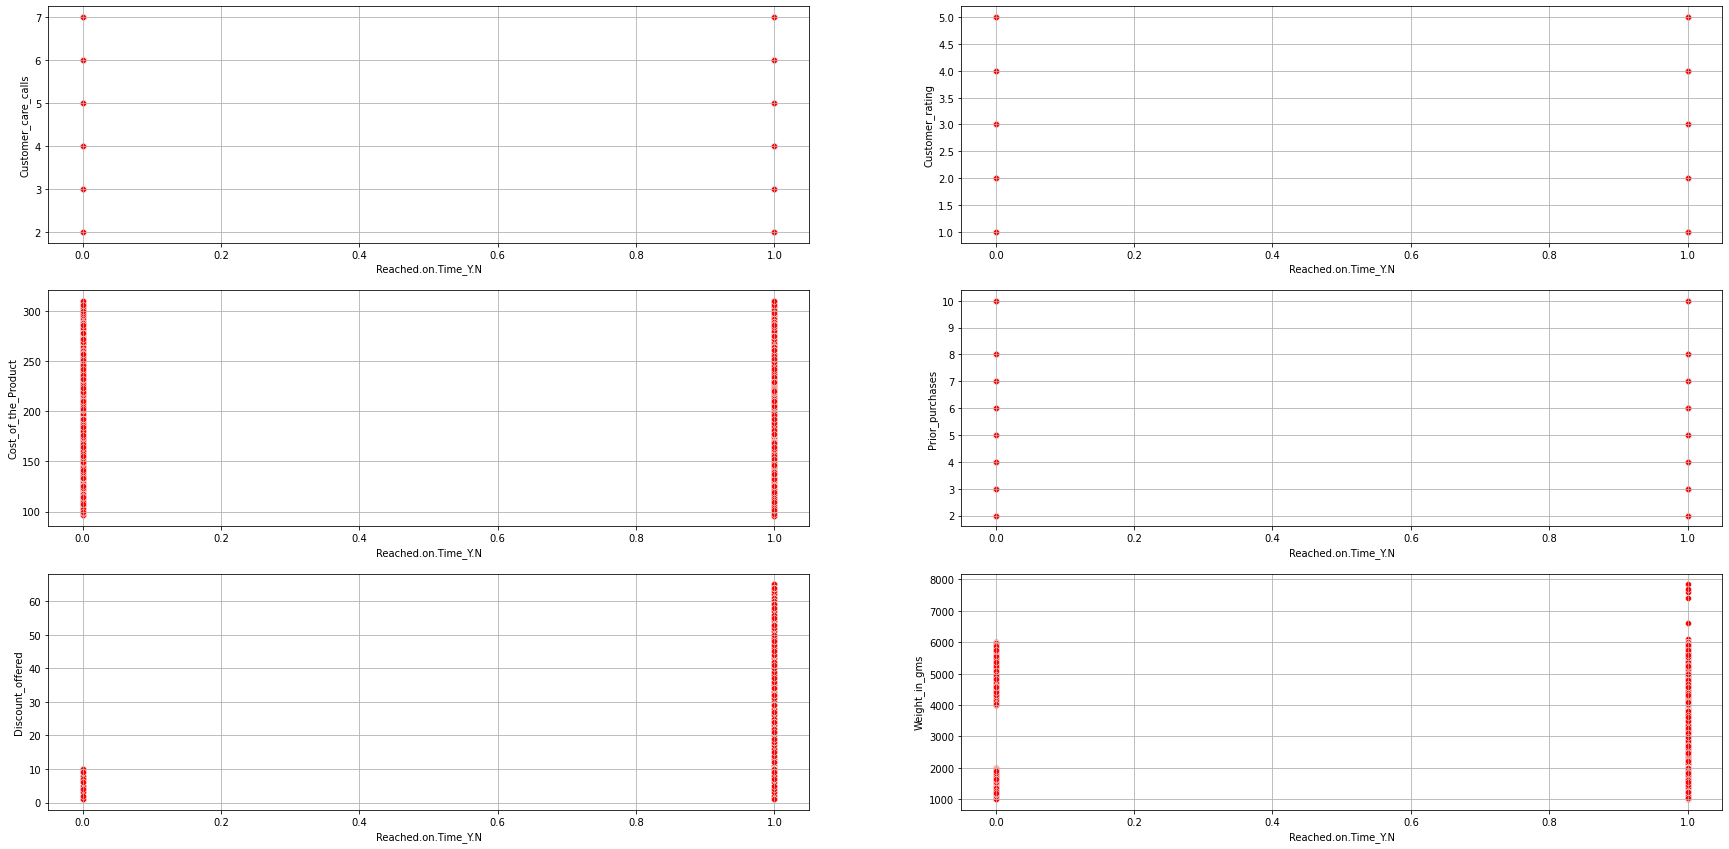

In [110]:
# fig size
fig, axes = plt.subplots(3,2, figsize = (30, 20))

# choose features
features_4 = df_num.columns[:-1].tolist()

# scatterplot 
k=1
for i in range(len(features_4)):
  if k <= 6:   
    plt.subplot(4,2,k)
    sns.scatterplot(x='Reached.on.Time_Y.N', y= features_4[i], data = df, color = 'r')
    plt.grid()
    k +=1
    i +=1

plt.show()

#Positive correlation

## (Cost of product) and (Customer care calls)

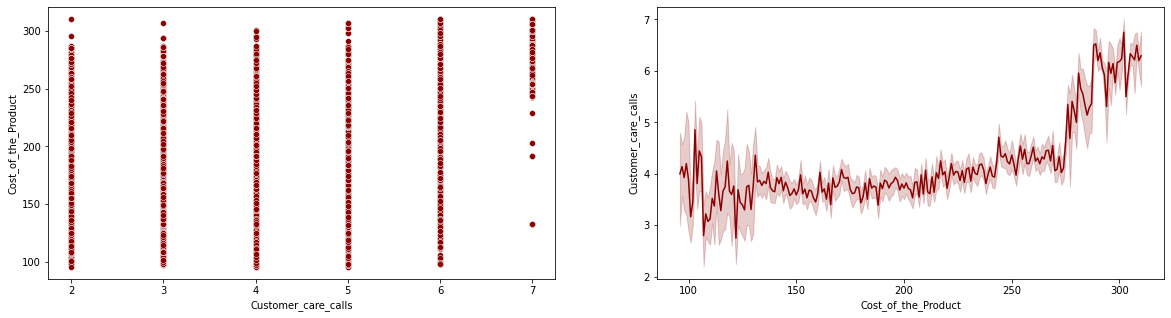

In [171]:
# fig size
fig, axes = plt.subplots(1,2, figsize = (20, 5))

# scatterplot
plt.subplot(1,2,1)
df_cost_calls = df.loc[:,['Cost_of_the_Product','Customer_care_calls']]
sns.scatterplot(data = df_cost_calls, y='Cost_of_the_Product', x='Customer_care_calls', color = 'darkred')

# lineplot
plt.subplot(1,2,2)
sns.lineplot(x='Cost_of_the_Product', y='Customer_care_calls', data= df_cost_calls, color = 'darkred')
plt.show()

##(Discount offered) and (Reach on time_Y.N)

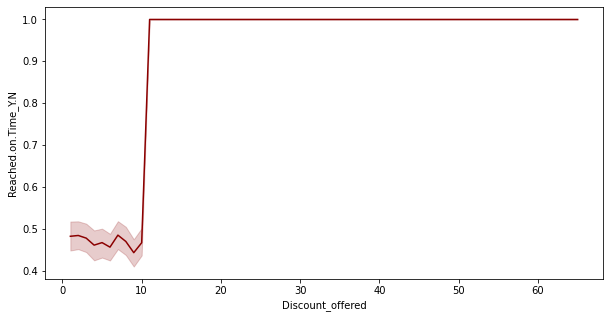

In [169]:
# fig size
plt.figure(figsize = (10,5))

# scatterplot
df_dis_rot = df.loc[:,['Discount_offered','Reached.on.Time_Y.N']]
sns.lineplot(x='Discount_offered' , y='Reached.on.Time_Y.N', data = df_dis_rot, color = 'darkred')
plt.show()

#Negative Correlation

## (Weight in gms) and (Customer care calls)

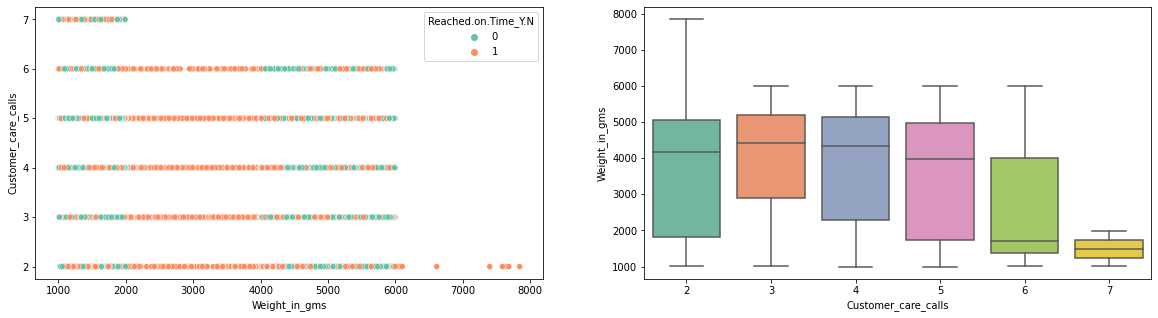

In [170]:
# fig size
fig, axes = plt.subplots(1,2, figsize = (20, 5))

# scatterplot
plt.subplot(1,2,1)
df_cus_wig = df.loc[:,['Customer_care_calls','Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Customer_care_calls', data = df_cus_wig, palette='Set2', hue = 'Reached.on.Time_Y.N')

# boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Customer_care_calls', y='Weight_in_gms', data = df_cus_wig, palette = 'Set2')
plt.show()

## (Weight_in_gms) and (Discount offered)


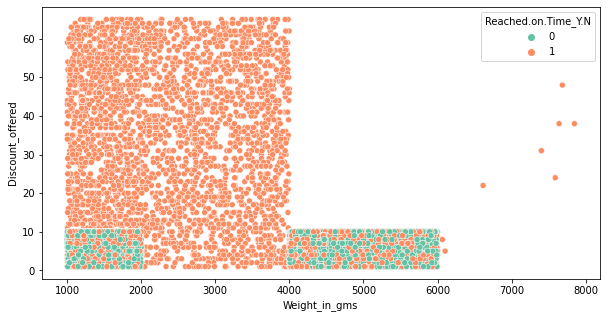

In [173]:
# scatterplot
plt.figure(figsize= (10,5))
df_dis_wig = df.loc[:,['Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Discount_offered', data = df_dis_wig, palette = 'Set2', hue = 'Reached.on.Time_Y.N')
plt.show()

## (Weight_in_gms) and (Reached.on.Time_Y.N)

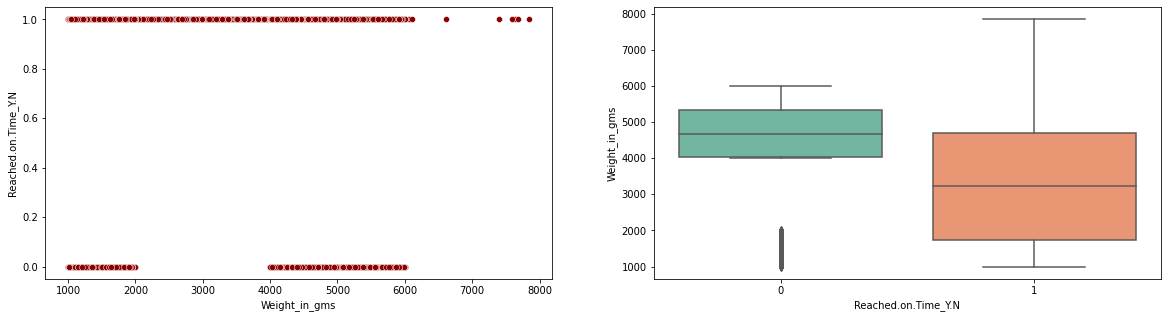

In [174]:
# fig size
fig, axes = plt.subplots(1,2, figsize = (20, 5))

# scatterplot
plt.subplot(1,2,1)
df_rot_wig = df.loc[:,['Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Reached.on.Time_Y.N', data = df_rot_wig, color ='darkred')

# boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data = df_cus_wig, palette = 'Set2')
plt.show()